In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

----

# Put data for all players for all seasons in one file

In [2]:
len(os.listdir('../data/2022-23/players/'))

573

In [3]:
all_players_all_season_data = pd.DataFrame()
for player in tqdm(os.listdir('../data/2022-23/players/')):
    try:
        tmp = pd.read_csv('../data/2022-23/players/' + player + '/history.csv')
        tmp['player'] = player
        all_players_all_season_data = pd.concat([tmp, all_players_all_season_data])
    except:
#         print(f'New player : {player}')
        pass
all_players_all_season_data = all_players_all_season_data.set_index(keys='player').reset_index()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 573/573 [00:01<00:00, 373.07it/s]


## Merging position data

In [4]:
position_data = pd.read_csv('../data/2022-23/players_raw.csv',usecols=['code','element_type'])
position_data = position_data.replace({1:'GK',2:'DEF',3:'MID',4:'FWD'})
position_data = position_data.rename(columns={'code':'element_code'})
position_data.head()

,element_code,element_type
0,58822,DEF
1,84450,MID
2,153256,MID
3,156074,DEF
4,167199,MID


In [5]:
(all_players_all_season_data['element_code'].isin(position_data['element_code'])).all()

True

In [6]:
all_players_all_season_data = all_players_all_season_data.merge(position_data)

In [7]:
all_players_all_season_data.head()

,player,assists,bonus,bps,clean_sheets,creativity,element_code,end_cost,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,season_name,start_cost,threat,total_points,yellow_cards,element_type
0,Çaglar_Söyüncü_267,0,0,48,0,6.8,218031,48,4,0,10.6,76.6,371,0,0,0,0,0,2018/19,50,22.0,9,1,DEF
1,Çaglar_Söyüncü_267,1,12,681,12,79.0,218031,49,35,1,107.5,755.6,3036,0,0,0,1,0,2019/20,45,238.0,120,4,DEF
2,Çaglar_Söyüncü_267,0,3,360,5,114.4,218031,53,30,1,67.7,403.6,1816,0,0,0,0,0,2020/21,55,157.0,59,2,DEF
3,Çaglar_Söyüncü_267,0,6,454,5,64.7,218031,49,44,1,76.2,606.4,2497,0,0,0,0,0,2021/22,50,90.0,66,5,DEF
4,Zack_Steffen_310,0,0,8,0,0.0,164484,44,1,0,1.0,9.6,90,0,0,0,0,1,2020/21,45,0.0,2,0,GK


# Simple EDA

In [8]:
all_players_all_season_data.shape

(2102, 24)

In [9]:
all_players_all_season_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 2101
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player            2102 non-null   object 
 1   assists           2102 non-null   int64  
 2   bonus             2102 non-null   int64  
 3   bps               2102 non-null   int64  
 4   clean_sheets      2102 non-null   int64  
 5   creativity        2102 non-null   float64
 6   element_code      2102 non-null   int64  
 7   end_cost          2102 non-null   int64  
 8   goals_conceded    2102 non-null   int64  
 9   goals_scored      2102 non-null   int64  
 10  ict_index         2102 non-null   float64
 11  influence         2102 non-null   float64
 12  minutes           2102 non-null   int64  
 13  own_goals         2102 non-null   int64  
 14  penalties_missed  2102 non-null   int64  
 15  penalties_saved   2102 non-null   int64  
 16  red_cards         2102 non-null   int64  


In [10]:
all_players_all_season_data.describe()

,assists,bonus,bps,clean_sheets,creativity,element_code,end_cost,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,start_cost,threat,total_points,yellow_cards
count,2102.00000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000
mean,2.03901,5.388677,267.882493,5.070885,186.957992,133255.620837,52.563273,22.016651,2.137012,68.163511,285.096004,1517.405328,0.065652,0.040913,0.036156,0.084681,6.174120,53.900571,209.735014,65.869648,2.325404
std,2.96359,6.648424,232.720408,4.589396,266.484262,95687.436448,13.639108,17.227934,3.792107,78.201926,294.826393,1107.092026,0.275045,0.223001,0.236237,0.293453,23.654545,13.230182,328.950116,53.696648,2.544551
min,0.00000,0.000000,0.000000,0.000000,0.000000,14937.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,-2.000000,0.000000
25%,0.00000,0.000000,34.000000,1.000000,0.000000,60689.000000,44.000000,6.000000,0.000000,0.000000,0.000000,435.250000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,17.000000,0.000000
50%,1.00000,3.000000,238.500000,4.000000,63.800000,106617.000000,49.000000,21.000000,1.000000,47.750000,213.100000,1539.500000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,69.000000,60.000000,2.000000
75%,3.00000,8.000000,446.750000,8.000000,292.675000,178186.000000,56.000000,35.000000,2.000000,108.100000,502.150000,2497.750000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,286.000000,102.000000,4.000000
max,23.00000,40.000000,988.000000,21.000000,1990.800000,547701.000000,142.000000,79.000000,32.000000,454.400000,1496.200000,3420.000000,4.000000,2.000000,3.000000,2.000000,167.000000,140.000000,2355.000000,303.000000,12.000000


In [11]:
all_players_all_season_data.describe(include='O')

,player,season_name,element_type
count,2102,2102,2102
unique,478,16,4
top,Theo_Walcott_400,2021/22,MID
freq,16,433,876


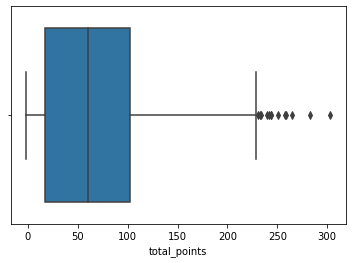

In [12]:
sns.boxplot(data=all_players_all_season_data, x='total_points')

----

In [13]:
# Converting cost to million
all_players_all_season_data['start_cost'] = all_players_all_season_data['start_cost']/10
all_players_all_season_data['end_cost'] = all_players_all_season_data['end_cost']/10

In [14]:
#Calculating PPM
all_players_all_season_data['PPM'] = all_players_all_season_data['total_points']/all_players_all_season_data['start_cost']

---

## Creating PPM table

In [15]:
df_PPM = pd.DataFrame(all_players_all_season_data.groupby(['season_name','element_type'])['PPM'].agg(['max','mean','idxmax','std'])).reset_index()
df_PPM = df_PPM.merge(all_players_all_season_data['player'].reset_index(), left_on='idxmax',right_on='index').drop(columns=['idxmax','index'])
df_PPM = df_PPM.rename(columns={'max':'max_PPM','mean':'mean_PPM','std':'std_PPM','element_type':'position'})
df_PPM.tail()

,season_name,position,max_PPM,mean_PPM,std_PPM,player
59,2020/21,MID,29.400000,10.860173,7.547242,Tomas_Soucek_468
60,2021/22,DEF,34.000000,11.663621,8.993743,Joel_Matip_276
61,2021/22,FWD,23.333333,10.175182,6.473102,Diogo_Teixeira da Silva_288
62,2021/22,GK,30.000000,11.547655,12.086231,Aaron_Ramsdale_15
63,2021/22,MID,31.692308,10.484388,7.536242,Jarrod_Bowen_465


In [16]:
print(f"Total points per gw for top 10k : {65}-{70}")
print(f"Total points per gw for top 10k w/o captaincy: {60}")
print(f"Total points per gw for top 10k w/o captaincy per million: {60/100}")

print(f"\nTotal points per season for top 10k : {65*38}-{70*38}")
print(f"Total points per season for top 10k w/o captaincy: {60*38}")
print(f"Total points per season for top 10k w/o captaincy per million: {60/100*38}")

Total points per gw for top 10k : 65-70
Total points per gw for top 10k w/o captaincy: 60
Total points per gw for top 10k w/o captaincy per million: 0.6

Total points per season for top 10k : 2470-2660
Total points per season for top 10k w/o captaincy: 2280
Total points per season for top 10k w/o captaincy per million: 22.8


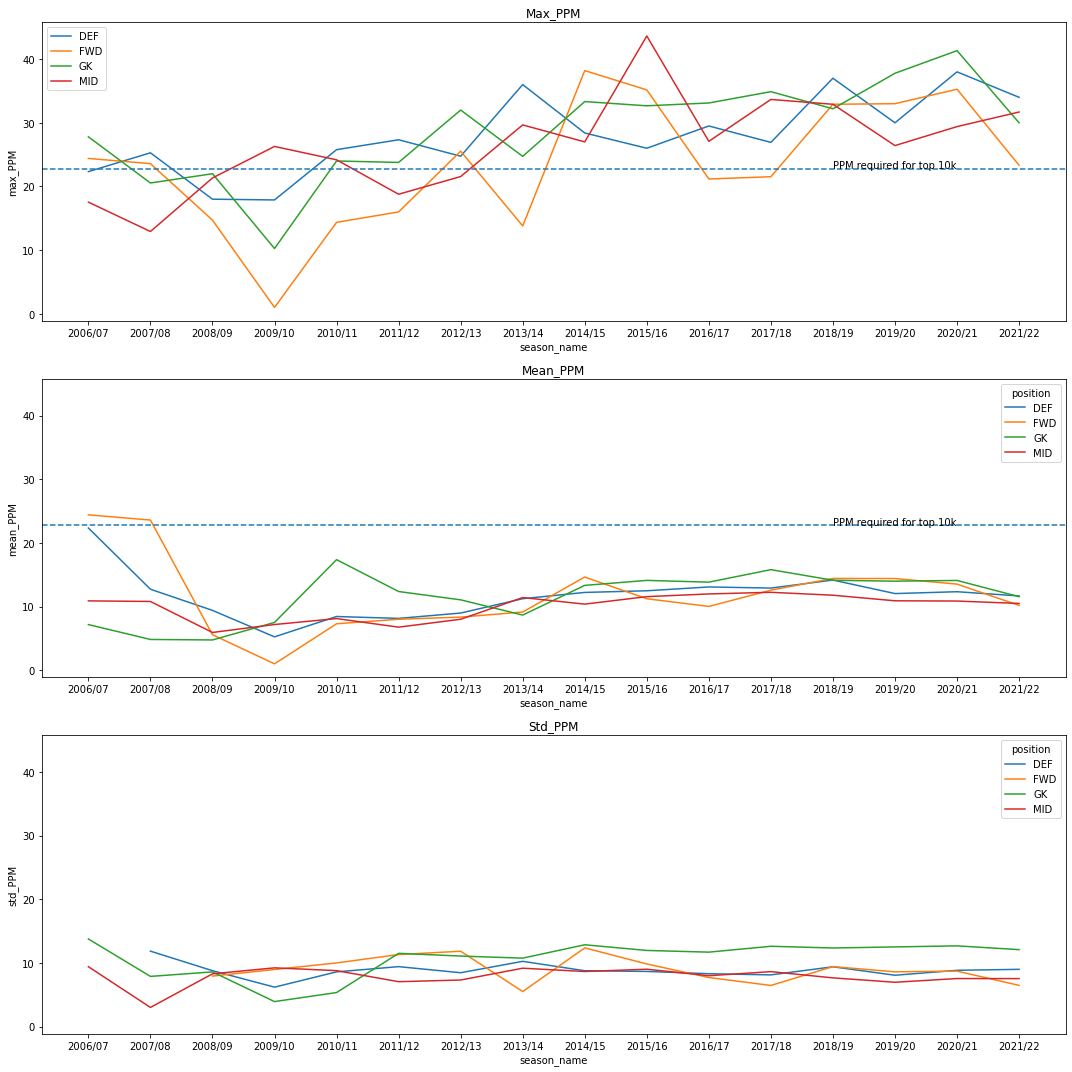

In [17]:
fig, ax = plt.subplots(3,1,figsize=(15,15),sharey=True)
sns.lineplot(data=df_PPM,x='season_name',y='max_PPM',hue='position',ax=ax[0])
ax[0].legend()
ax[0].set_title('Max_PPM')
ax[0].axhline(22.8,ls='--')
ax[0].text(x=12,y=22.8,s='PPM required for top 10k')
sns.lineplot(data=df_PPM,x='season_name',y='mean_PPM',hue='position',ax=ax[1])
ax[1].set_title('Mean_PPM')
ax[1].axhline(22.8,ls='--')
ax[1].text(x=12,y=22.8,s='PPM required for top 10k')
sns.lineplot(data=df_PPM,x='season_name',y='std_PPM',hue='position',ax=ax[2])
ax[2].set_title('Std_PPM')
fig.tight_layout()

In [18]:
df_PPM.loc[df_PPM['position'] == 'GK',['season_name','player','max_PPM']]

,season_name,player,max_PPM
2,2006/07,Scott_Carson_502,27.800000
6,2007/08,Scott_Carson_502,20.545455
10,2008/09,Scott_Carson_502,22.000000
14,2009/10,Asmir_Begović_176,10.250000
18,2010/11,Asmir_Begović_176,24.000000
22,2011/12,Wayne_Hennessey_518,23.777778
26,2012/13,Asmir_Begović_176,32.000000
30,2013/14,Asmir_Begović_176,24.727273
34,2014/15,Tom_Heaton_348,33.333333
38,2015/16,Kasper_Schmeichel_248,32.666667


In [19]:
df_PPM.loc[df_PPM['position'] == 'MID',['season_name','player','max_PPM']]

,season_name,player,max_PPM
3,2006/07,James_Milner_274,17.538462
7,2007/08,James_Milner_274,12.923077
11,2008/09,James_Milner_274,21.333333
15,2009/10,James_Milner_274,26.285714
19,2010/11,Jordan_Henderson_275,24.181818
23,2011/12,Theo_Walcott_400,18.777778
27,2012/13,Theo_Walcott_400,21.555556
31,2013/14,Adam_Lallana_101,29.666667
35,2014/15,Jordan_Henderson_275,27.000000
39,2015/16,Riyad_Mahrez_303,43.636364


In [20]:
df_PPM.loc[df_PPM['position'] == 'FWD',['season_name','player','max_PPM']]

,season_name,player,max_PPM
1,2006/07,Cristiano Ronaldo_dos Santos Aveiro_326,24.400000
5,2007/08,Cristiano Ronaldo_dos Santos Aveiro_326,23.583333
9,2008/09,Cristiano Ronaldo_dos Santos Aveiro_326,14.714286
13,2009/10,Danny_Welbeck_103,1.000000
17,2010/11,Danny_Welbeck_103,14.363636
21,2011/12,Danny_Welbeck_103,16.000000
25,2012/13,Christian_Benteke_155,25.538462
29,2013/14,Dwight_Gayle_361,13.800000
33,2014/15,Harry_Kane_427,38.200000
37,2015/16,Jamie_Vardy_255,35.166667


----

In [21]:
df_PPM_rolling = pd.DataFrame()
for pos in ['GK','DEF','MID','FWD']:
    tmp =  df_PPM.loc[df_PPM['position'] == pos,['season_name','max_PPM']].reset_index(drop=True)
    tmp[f'rolling_mean_of_max_PPM_for_{pos}'] = tmp['max_PPM'].rolling(3).mean()
    df_PPM_rolling = pd.concat([tmp, df_PPM_rolling],axis=1)
df_PPM_rolling = df_PPM_rolling.iloc[:,[0,2,5,8,11]]
df_PPM_rolling

,season_name,rolling_mean_of_max_PPM_for_FWD,rolling_mean_of_max_PPM_for_MID,rolling_mean_of_max_PPM_for_DEF,rolling_mean_of_max_PPM_for_GK
0,2006/07,NaN,NaN,NaN,NaN
1,2007/08,NaN,NaN,NaN,NaN
2,2008/09,20.899206,17.264957,21.873016,23.448485
3,2009/10,13.099206,20.180708,20.389356,17.598485
4,2010/11,10.025974,23.933622,20.553377,18.750000
5,2011/12,10.454545,23.081770,23.664488,19.342593
6,2012/13,18.634033,21.505051,25.953704,26.592593
7,2013/14,18.446154,23.333333,29.361111,26.835017
8,2014/15,25.846154,26.074074,29.716667,30.020202
9,2015/16,29.055556,33.434343,30.133333,30.242424


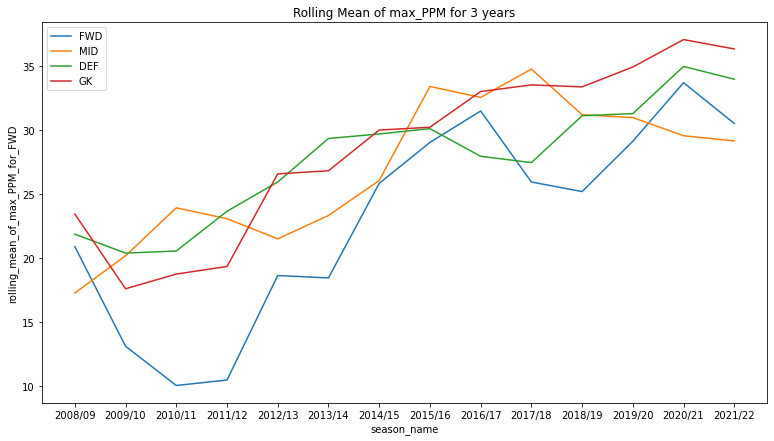

In [22]:
fig, ax = plt.subplots(1,1,figsize=(13,7),sharey=True)
sns.lineplot(data=df_PPM_rolling,x='season_name',y='rolling_mean_of_max_PPM_for_FWD',ax=ax,label='FWD')
sns.lineplot(data=df_PPM_rolling,x='season_name',y='rolling_mean_of_max_PPM_for_MID',ax=ax,label='MID')
sns.lineplot(data=df_PPM_rolling,x='season_name',y='rolling_mean_of_max_PPM_for_DEF',ax=ax,label='DEF')
sns.lineplot(data=df_PPM_rolling,x='season_name',y='rolling_mean_of_max_PPM_for_GK',ax=ax,label='GK')
ax.set_title('Rolling Mean of max_PPM for 3 years')
ax.legend()

- Defenders are going up in PPM 
- GK are very high PPM
- FWD, MID are going bad

---

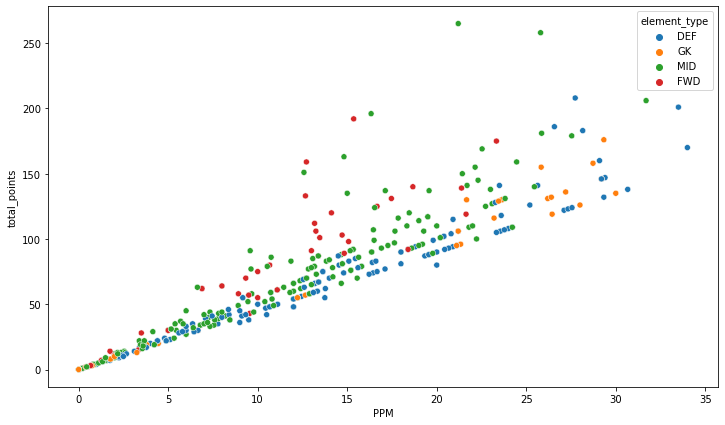

In [24]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
sns.scatterplot(data = all_players_all_season_data[all_players_all_season_data['season_name']=='2021/22'], 
                x='PPM' ,y='total_points',hue='element_type', ax=ax)